# A product and service-based business always need their Data Scientist to predicttheir future sales with every step they take to manipulate the cost of advertising theirproduct. So let’s start the task of sales prediction with machine learning using Python.

to import the required library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# importt the dataset

In [18]:
df=pd.read_csv("Advertising.csv") #to read the advertising csv file

In [19]:
df


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [20]:
df=df.drop(columns=["Unnamed: 0"]) #to remove the unnamed column we are not use it


In [21]:
df.info() #to check if any null values are present in the dataset or not and to show the datatype of objects


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
df.describe()  #to show the dataset mean,max,min,std values in columns wise 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
df.isnull().any() #to check if null values present in the dataset or not it return the boolean values

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [24]:
df.isnull().sum() #to check if null values present in the dataset or not

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [25]:
df.head() #to print the top5 rows 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Visualizing

Text(0.5, 1.0, 'Tv vs Sales')

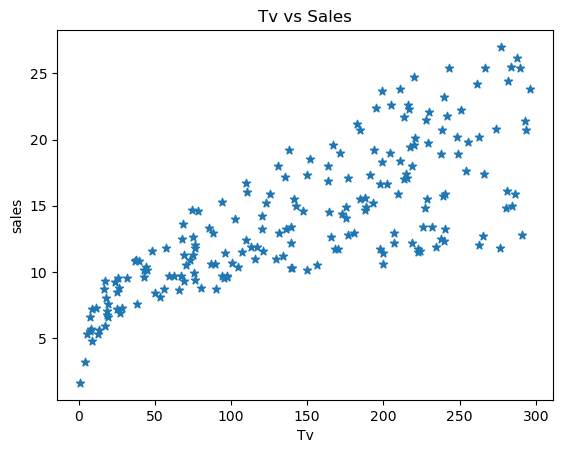

In [30]:
plt.scatter(df.TV,df.Sales,marker="*") # to plot the graph between tv vs sales 
plt.xlabel("Tv")
plt.ylabel("sales")
plt.title("Tv vs Sales")

Text(0.5, 1.0, 'TV vs Newspaper')

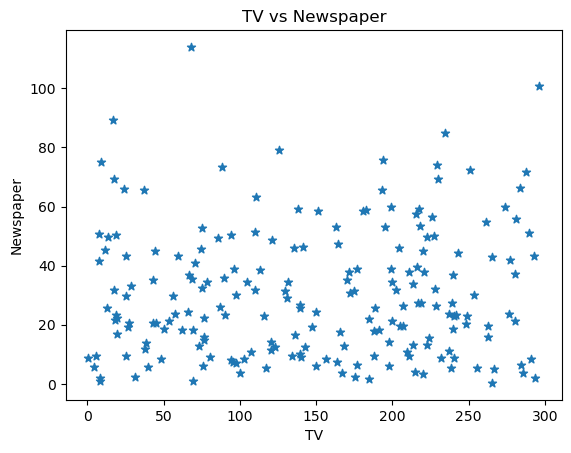

In [32]:
plt.scatter(df.TV,df.Newspaper,marker="*") # to plot the graph between tv vs newspaper
plt.xlabel("TV")
plt.ylabel("Newspaper")
plt.title("TV vs Newspaper")

Text(0.5, 1.0, 'TV vs Radio')

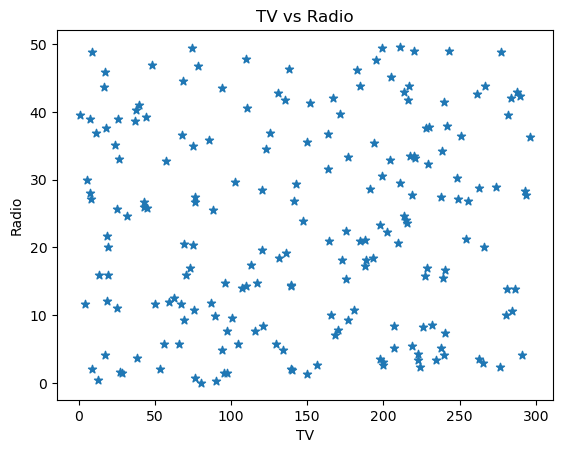

In [33]:
plt.scatter(df.TV,df.Radio,marker="*") # to plot the graph between tv vs radio
plt.xlabel("TV") 
plt.ylabel("Radio")
plt.title("TV vs Radio")

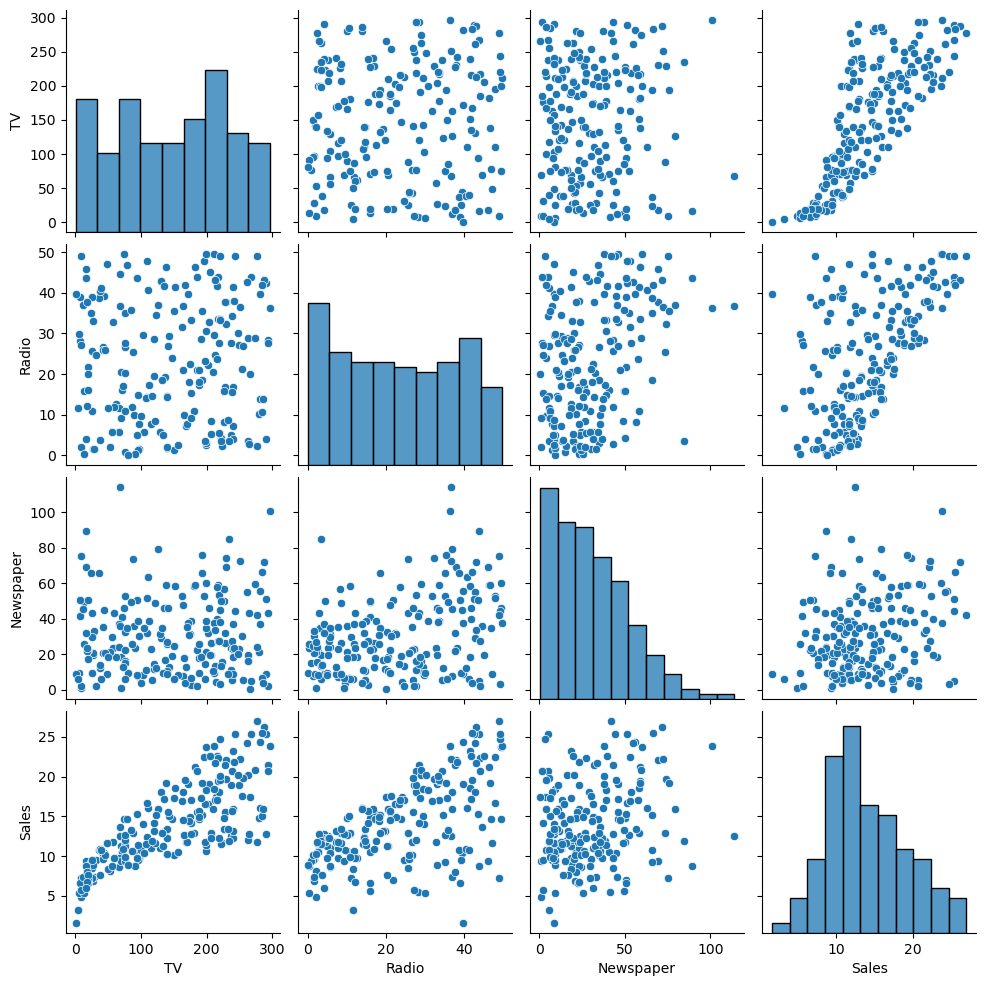

In [34]:
sns.pairplot(df) #to plot pairwise relationships between variables within a dataset. 

In [39]:
sales=df.Sales

In [41]:
sales.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# split the trainset and data set

In [44]:
X=df.iloc[:,:-1].values #The iloc function works by selecting rows and columns by their integer positions, rather than by their names
Y=df.iloc[:,-1].values
print(X) 
print(Y)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

# Let us try Machine learning algorithm for which the data fits properly

In [45]:
from sklearn.model_selection import train_test_split #module for splitting data arrays into two subsets: for training data and for testing data. With this function, you don’t need to divide the dataset manually. By default, train_test_split will make random partitions for the two subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 40)

In [46]:
X_train


array([[286. ,  13.9,   3.7],
       [ 50. ,  11.6,  18.4],
       [ 90.4,   0.3,  23.2],
       [ 69. ,   9.3,   0.9],
       [255.4,  26.9,   5.5],
       [  7.8,  38.9,  50.6],
       [ 43. ,  25.9,  20.5],
       [206.8,   5.2,  19.4],
       [ 43.1,  26.7,  35.1],
       [230.1,  37.8,  69.2],
       [182.6,  46.2,  58.7],
       [227.2,  15.8,  49.9],
       [123.1,  34.6,  12.4],
       [188.4,  18.1,  25.6],
       [ 97.5,   7.6,   7.2],
       [281.4,  39.6,  55.8],
       [  7.3,  28.1,  41.4],
       [187.9,  17.2,  17.9],
       [228. ,  37.7,  32. ],
       [273.7,  28.9,  59.7],
       [199.8,   2.6,  21.2],
       [ 17.2,  45.9,  69.3],
       [184.9,  21. ,  22. ],
       [ 31.5,  24.6,   2.2],
       [ 57.5,  32.8,  23.5],
       [180.8,  10.8,  58.4],
       [116. ,   7.7,  23.1],
       [195.4,  47.7,  52.9],
       [151.5,  41.3,  58.5],
       [222.4,   4.3,  49.8],
       [248.4,  30.2,  20.3],
       [209.6,  20.6,  10.7],
       [117.2,  14.7,   5.4],
       [ 5

In [47]:
Y_train

array([15.9,  8.4,  8.7,  9.3, 19.8,  6.6,  9.6, 12.2, 10.1, 22.1, 21.2,
       14.8, 15.2, 14.9,  9.7, 24.4,  5.5, 14.7, 21.5, 20.8, 10.6,  9.3,
       15.5,  9.5, 11.8, 12.9, 11. , 22.4, 18.5, 11.7, 20.2, 15.9, 11.9,
        9.7, 23.8, 15.5, 10.1, 19.7,  8.8, 12.9, 12.5, 16.6, 15.9, 12. ,
       18.9, 10.8, 24.2,  8.6, 25.5, 14.9, 10.5,  6.9,  6.7, 12.9, 23.2,
        7.6,  5.3, 14.8,  7.2, 13.3, 12.6, 18. , 11.6,  7.6, 10.7,  9.6,
       13.2,  3.2, 11.5, 12.5, 11.4, 15.9, 12.6,  6.6, 17.3, 10.3, 11.3,
       21.7,  5.9, 11.8,  9.5, 10.1,  8.8, 10.4, 24.7, 14. , 23.8, 25.4,
       13.6, 16.1, 13.2, 13.4, 25.4, 19. , 13.4,  9.4, 16.9, 11.7, 17.1,
       11.6, 11.8, 19.6,  5.3, 11.9, 18. , 16. ,  8.5,  8.1, 21.4, 12.8,
       19.2, 15.3, 17.3, 17.2, 12.7,  5.6, 20.7, 19.4, 19. ,  7.3, 10.5,
        4.8, 22.6, 12.2,  9.7, 11. ,  7.3, 23.7, 17. , 12.9, 14.6, 14.6,
       12.4,  9.2, 19.6, 11.4, 17.6, 11.9, 13.2, 18.3])

#  Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression #statistical method for modeling relationships between a dependent variable with a given set of independent variables.

In [49]:
reg=LinearRegression()

In [50]:
reg

LinearRegression()

In [52]:
reg.fit(X_test,Y_test)

LinearRegression()

# Accuracy

In [54]:
print("Accurucy :",reg.score(X_test,Y_test)*100,"%") #to find the accuracy of the dataset

Accurucy : 86.44604942553148 %


In [55]:
print("Accurucy :",reg.score(X_train,Y_train)*100,"%")

Accurucy : 89.66064660738293 %


# Training the dataset

In [57]:
x_pred=reg.predict(X_test)  #to predict the labels of data values based on the training model.
x_pred

array([12.79055042, 11.72337259, 11.88967924, 17.62566963, 24.77754147,
       14.27563854, 20.51429582, 11.28915489,  9.86562175,  7.86959963,
       19.02074188, 19.36038595, 12.44255476, 14.51072925, 16.40279572,
        8.89556668, 14.52205877, 16.84441878,  7.24517263, 14.84400864,
       10.19709557, 19.59262375, 15.73270525, 21.81508303, 14.10088517,
       11.39564253,  9.3378279 , 17.66151585,  7.32543307,  9.04625826,
       18.9943778 ,  8.73829279, 17.66169488, 18.39321776, 17.14432532,
        9.70576839, 15.34460129, 21.10258305, 11.77081419, 23.27795394,
       10.87126092,  6.26451405, 20.89499683,  8.83650964, 21.74303955,
       13.25802284, 17.1720706 , 15.34476369, 17.93800727, 11.0842591 ,
       24.93852088,  7.6368311 ,  8.75914762, 16.39248381,  7.82645357,
       16.52013517, 13.68459191, 20.62555061,  9.65230124, 10.20828277])

In [59]:
reg.predict([[102.7,33.4,55.7]])

array([13.62324877])